In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
API_KEY = 'JB01QMIO6Y6OVRTD'
BASE_URL = 'https://www.alphavantage.co/query'


In [33]:
def fetch_data(symbol, function, **params):
    params['function'] = function
    params['symbol'] = symbol
    params['apikey'] = API_KEY
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    return data

In [34]:
def symbol_data_to_data_frame(data):
    df = pd.DataFrame(data).T
    df.index = pd.to_datetime(df.index)
    df['5. adjusted close'] = df['5. adjusted close'].astype(float)
    return df

In [38]:
def line_plot_symbol_df(df, titel, x, y):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['5. adjusted close'])
    plt.title(titel)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

In [4]:
# List of sector symbols
sectors = [
    "XLC",  # Communication Services
    "XLY",  # Consumer Discretionary
    "XLP",  # Consumer Staples
    "XLE",  # Energy
    "XLF",  # Financials
    "XLV",  # Health Care
    "XLI",  # Industrials
    "XLB",  # Materials
    "XLRE", # Real Estate
    "XLK",  # Technology
    "XLU",  # Utilities
]

In [12]:
def fetch_sector_data():
    # Dictionary to store sector data
    sector_data = {}

    #non-premium couter
    i = 0

    # Loop through sectors and make API requests
    for sector in sectors:
        data = fetch_data(sector, "TIME_SERIES_MONTHLY_ADJUSTED" )
        if len(data) > 1:
            sector_data[sector] = data['Monthly Adjusted Time Series']
        else:
            #exception for data fetch error
            raise Exception("data fetch error" + ' ' + data['Note'])
        #non-premium delay
        i += 1
        if i == 5:
            time.sleep(60)
            i=0
    return sector_data
sector_data = fetch_sector_data()
print(sector_data)

{'XLC': {'2023-09-01': {'1. open': '67.9500', '2. high': '67.9500', '3. low': '66.9228', '4. close': '67.1000', '5. adjusted close': '67.1000', '6. volume': '4034582', '7. dividend amount': '0.0000'}, '2023-08-31': {'1. open': '68.4200', '2. high': '68.9200', '3. low': '64.3150', '4. close': '67.7300', '5. adjusted close': '67.7300', '6. volume': '121411440', '7. dividend amount': '0.0000'}, '2023-07-31': {'1. open': '64.8700', '2. high': '69.2200', '3. low': '64.5250', '4. close': '68.7900', '5. adjusted close': '68.7900', '6. volume': '124113723', '7. dividend amount': '0.0000'}, '2023-06-30': {'1. open': '62.4200', '2. high': '65.6100', '3. low': '62.2800', '4. close': '65.0800', '5. adjusted close': '65.0800', '6. volume': '123494649', '7. dividend amount': '0.1049'}, '2023-05-31': {'1. open': '59.8100', '2. high': '62.7200', '3. low': '57.4300', '4. close': '62.2400', '5. adjusted close': '62.1387', '6. volume': '136868565', '7. dividend amount': '0.0000'}, '2023-04-28': {'1. open

In [26]:
# Convert sector data to pandas DataFrames
def sector_to_data_frame():
    sector_dfs = {}
    for sector, data in sector_data.items():
        df = pd.DataFrame(data).T
        df.index = pd.to_datetime(df.index)
        df['5. adjusted close'] = df['5. adjusted close'].astype(float)
        sector_dfs[sector] = df#.head(15)  # Extract the first 15 rows
    return sector_dfs

sector_dfs = sector_to_data_frame()

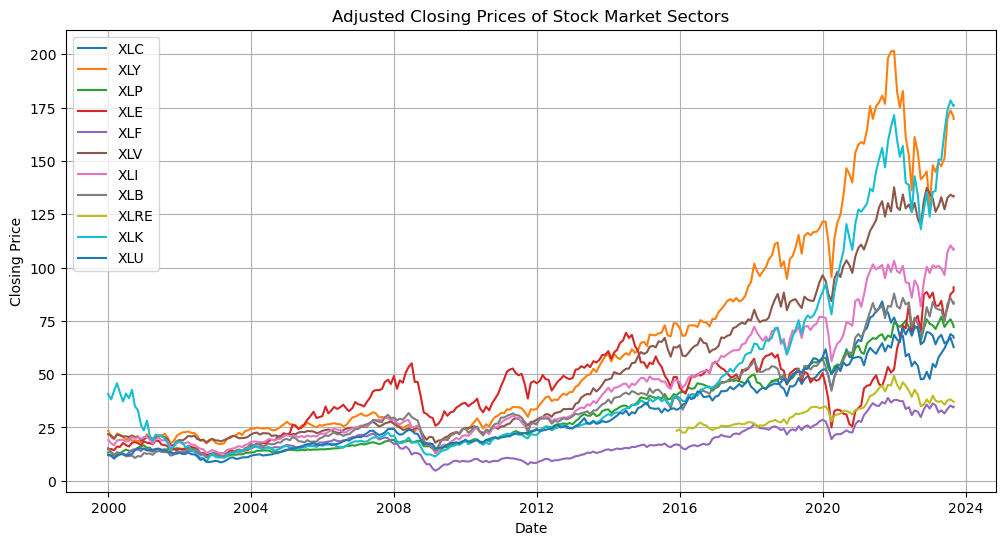

In [27]:
# Create a line plot for each sector's adjusted close values
def line_plot_sectors():
    plt.figure(figsize=(12, 6))
    for sector, df in sector_dfs.items():
        plt.plot(df.index, df['5. adjusted close'], label=sector)

    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title("Adjusted Closing Prices of Stock Market Sectors")
    plt.legend()
    plt.grid(True)
    plt.show()

line_plot_sectors()

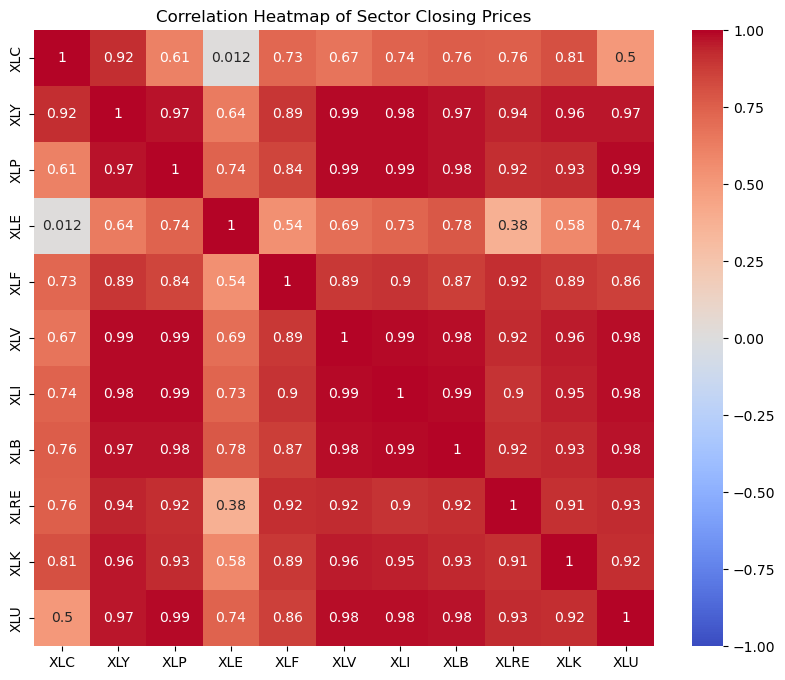

In [15]:
def heatmap_sectors():  
    # Combine the opening prices into a single DataFrame
    combined_df = pd.concat([df["5. adjusted close"] for df in sector_dfs.values()], axis=1)
    combined_df.columns = sectors

    # Calculate the correlation matrix
    correlation_matrix = combined_df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap of Sector Closing Prices")
    plt.show()
    
heatmap_sectors()

In [20]:
def fetch_sp500_data():
    data = fetch_data("SPY", "TIME_SERIES_MONTHLY_ADJUSTED")
    if len(data) > 1:
            sp500_data = data['Monthly Adjusted Time Series']
    else:
        #exception for data fetch error
        raise Exception("data fetch error" + ' ' + data['Note'])
    return sp500_data

sp500_data = fetch_sp500_data()

In [19]:
sp500_df = symbol_data_to_data_frame(sp500_data)
print(sp500_df)

             1. open   2. high    3. low  4. close 5. adjusted close  \
2023-09-01  453.1700  453.6700  449.6800  451.1900          451.1900   
2023-08-31  456.2700  457.2500  433.0100  450.3500          450.3500   
2023-07-31  442.9200  459.4400  437.0600  457.7900          457.7900   
2023-06-30  418.0900  444.3000  416.7900  443.2800          443.2800   
2023-05-31  415.4700  422.5800  403.7400  417.8500          416.2980   
...              ...       ...       ...       ...               ...   
2000-04-28  150.1250  153.1093  133.5000  145.0937           94.5360   
2000-03-31  137.6250  155.7500  135.0312  150.3750           97.9770   
2000-02-29  139.7500  144.5625  132.7187  137.4375           89.3222   
2000-01-31  148.2500  148.2500  135.0000  139.5625           90.7032   
1999-12-31  139.3125  147.5625  139.0000  146.8750           95.4557   

             6. volume 7. dividend amount  
2023-09-01    58944098             0.0000  
2023-08-31  1755315375             0.0000  
202

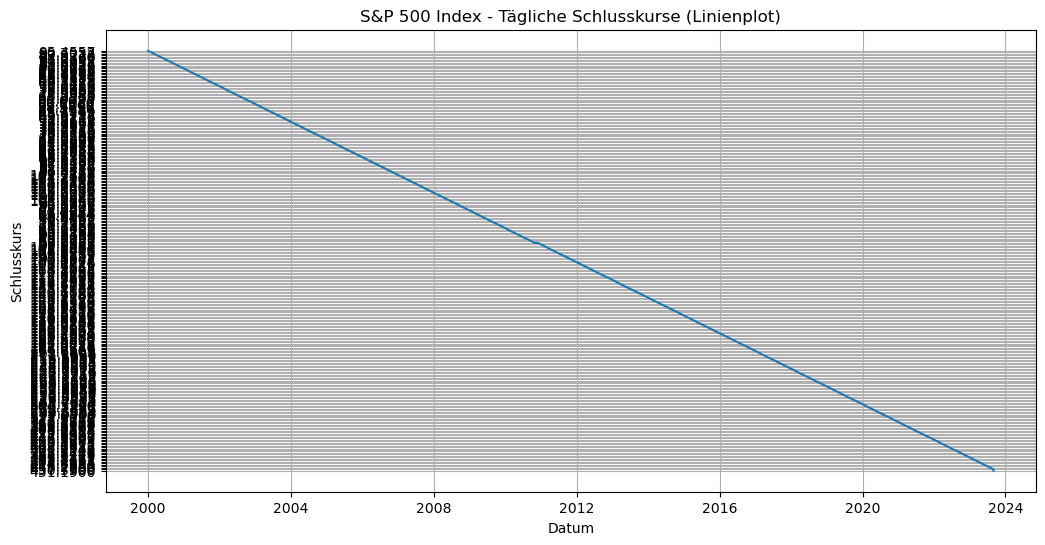

In [39]:
line_plot_symbol_df(sp500_df, "S&P 500 Index - TÃ¤gliche Schlusskurse (Linienplot)", "Datum", "Schlusskurs")

In [57]:
def market_percentage(sector_d, sp500_d):
    for symbol, data in sector_d.items():
        print(data)
        for date in data.index():
            print(date)
            data[date] = (data[date]['5. adjusted close']/ sp500_data[date]['5. adjusted close']) *100
    for date, values in sp500_d.items():
        sp500_d[date] = 100
    market_data = sector_d
    market_data["SPY"] = sp500_d
    return market_data

market_data = market_percentage(sector_dfs, sp500_df)
print(market_data)

            1. open  2. high   3. low 4. close  5. adjusted close  6. volume  \
2023-09-01  67.9500  67.9500  66.9228  67.1000            67.1000    4034582   
2023-08-31  68.4200  68.9200  64.3150  67.7300            67.7300  121411440   
2023-07-31  64.8700  69.2200  64.5250  68.7900            68.7900  124113723   
2023-06-30  62.4200  65.6100  62.2800  65.0800            65.0800  123494649   
2023-05-31  59.8100  62.7200  57.4300  62.2400            62.1387  136868565   
...             ...      ...      ...      ...                ...        ...   
2018-11-30  46.1900  46.7900  42.3800  45.0100            43.1670   53149541   
2018-10-31  49.1700  49.2200  43.0700  46.0400            44.1548  115192982   
2018-09-28  49.0500  49.5300  47.1700  49.0000            46.9936   44621850   
2018-08-31  48.5600  50.0600  47.9000  49.1800            47.0387    6752829   
2018-07-31  49.1100  52.1100  47.8690  48.4600            46.3500    8147373   

           7. dividend amount  
2023-09

TypeError: 'DatetimeIndex' object is not callable